# 核密度估计（KDE）
## 内核函数-gaussian

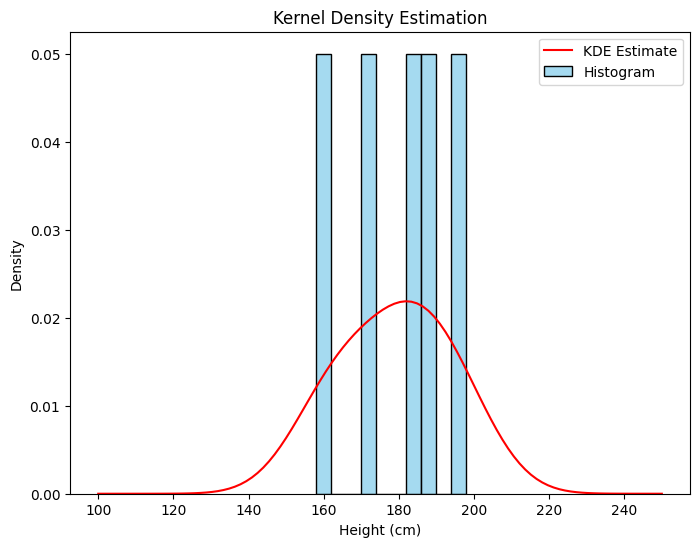

In [1]:
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# sample data
data = np.array([160, 170, 182, 186, 197])

# calculate the optimal bandwidth using Silverman's rule
std_dev = np.std(data)
n = len(data)
bandwidth = 1.06 * std_dev * n ** (-1/5)

# perform KDE with gaussian_kde
kde = gaussian_kde(data, bw_method=bandwidth / std_dev)

# plotting
x_values = np.linspace(100, 250, 100)  # Range for plot
plt.figure(figsize=(8, 6))

bin_width = 4
bins = np.arange(min(data) - bin_width / 2, max(data) + bin_width, bin_width)
sns.histplot(data, bins=bins, kde=False, color="skyblue", label="Histogram", stat="density")
plt.plot(x_values, kde(x_values), color="red", label="KDE Estimate")
plt.legend()
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.title("Kernel Density Estimation")
plt.show()

## 内核函数：Epanechnikov, uniform, triangular

In [5]:
import numpy as np

def uniform_kernel(x):
    return 0.5 * (np.abs(x) <= 1)

def epanechnikov_kernel(x):
    return 0.75 * (1 - x**2) * (np.abs(x) <= 1)

def triangular_kernel(x):
    return (1 - np.abs(x)) * (np.abs(x) <= 1)

# KDE function to apply kernels 
def kde_custom(x_values, data, bandwidth, kernel_func): 
    densities = []
    for x in x_values: 
        kernel_values = kernel_func((x - data) / bandwidth)
        density = np.sum(kernel_values) / (len(data) * bandwidth) 
        densities.append(density)
    return np.array(densities)

x_values = np.linspace(100, 250, 100) 

kde_uniform = kde_custom(x_values, data, bandwidth, uniform_kernel)
kde_epanechnikov = kde_custom(x_values, data, bandwidth, epanechnikov_kernel)
kde_triangular = kde_custom(x_values, data, bandwidth, triangular_kernel)